# 含并行连结的网络

Inception块的核心思想是：通过不同大小的卷积核来提取图像的不同特征，最后将这些卷积核的输出在通道维上连结，从而得到不同空间分辨率但语义相同的特征。

In [1]:
import d2lzh as d2l
from mxnet import autograd, gluon, init, nd
from mxnet.gluon import nn

# Inception块
class Inception(nn.Block):
    def __init__(self, c1, c2, c3, c4, **kwargs):
        super(Inception, self).__init__(**kwargs)
        # 线路1，单1x1卷积层
        self.p1_1 = nn.Conv2D(c1, kernel_size=1, strides=1, activation='relu')
        # 线路2，1x1卷积层后接3x3卷积层
        self.p2_1 = nn.Conv2D(c2[0], kernel_size=1, strides=1, activation='relu')
        self.p2_2 = nn.Conv2D(c2[1], kernel_size=3, padding=1, activation='relu')
        # 线路3，1x1卷积层后接5x5卷积层
        self.p3_1 = nn.Conv2D(c3[0], kernel_size=1, strides=1, activation='relu')
        self.p3_2 = nn.Conv2D(c3[1], kernel_size=5, padding=2, activation='relu')
        # 线路4，3x3最大池化层后接1x1卷积层
        self.p4_1 = nn.MaxPool2D(pool_size=3, strides=1, padding=1)
        self.p4_2 = nn.Conv2D(c4, kernel_size=1, strides=1, activation='relu')

    def forward(self, x):
        p1 = self.p1_1(x)
        p2 = self.p2_2(self.p2_1(x))
        p3 = self.p3_2(self.p3_1(x))
        p4 = self.p4_2(self.p4_1(x))
        return nd.concat(p1, p2, p3, p4, dim=1)

GoogLeNet模型

In [2]:
b1=nn.Sequential()
b1.add(nn.Conv2D(64, kernel_size=7, strides=2, padding=3, activation='relu'),
       nn.MaxPool2D(pool_size=3, strides=2, padding=1))

In [3]:
b2=nn.Sequential()
b2.add(nn.Conv2D(64, kernel_size=1),
       nn.Conv2D(192, kernel_size=3, padding=1, activation='relu'),
       nn.MaxPool2D(pool_size=3, strides=2, padding=1))

In [4]:
b3=nn.Sequential()
b3.add(Inception(64, (96, 128), (16, 32), 32),
       Inception(128, (128, 192), (32, 96), 64),
       nn.MaxPool2D(pool_size=3, strides=2, padding=1))

此处不再敲，跑不动

...

对比AlexNet、VGG、NiN和GooLeNet的模型参数尺寸

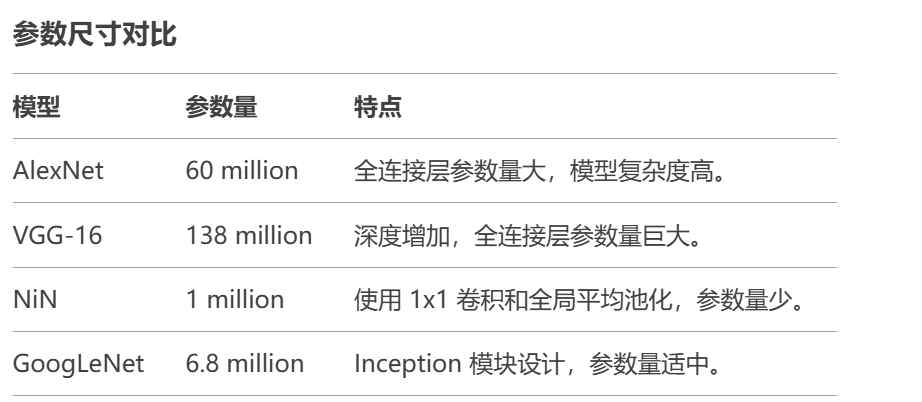

AlexNet 和 VGG 的参数量较大，尤其是全连接层占据了大部分参数。

NiN 通过 1x1 卷积和全局平均池化，显著减少了参数量。

GoogLeNet 通过 Inception 模块的设计，在保持高性能的同时，控制了参数量。